# Ensemble Models

Bank Marketing data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). This is a Supervised - Classification task

Our goal is to predict the output variable y - indicates whether a client will subscribe a term deposit

## Pseudo Code
    1) Data Analysis/Understanding of the data
    2) Encoding the categorical variables
    3) Scaling of the data/Normalization of the data
    4) Shuffle the data and split the training and test data 70-30
    4) Use bagging algorithm to predict the output variable y. Analyze the results using atleast 3 performance metrics
    5) Use boosting algorithm to predict the output variable y. Analyze the results using atleast 3 performance metrics

## 1) Data Preparation/Analysis & understanding of data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, recall_score, roc_auc_score, roc_curve, mean_squared_error, auc
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, average_precision_score, cohen_kappa_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.svm import SVC
from statistics import mode
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bmarketing_df = pd.read_csv("bank-full.csv", delimiter=';')
bmarketing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bmarketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bmarketing_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data Attributes
    - 17 columns with output feature 'y' - determines whether a client will subscribe to a term deposit. 
    - 7 Numeric fields
        age      
        balance  
        day      
        duration 
        campaign 
        pdays    
        previous 
    - Object fields
        job      
        marital  
        education
        default  
        housing  
        loan     
        contact  
        month    
        poutcome 
    - There are no null values and hence no data cleaning is required.
    - Encoding of the character fields to numeric is required to use different algorithms to predict the output variable y

In [5]:
bmarketing_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bmarketing_df.y.value_counts()/len(bmarketing_df)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

### The data is highly imbalanced with output variable y=yes with 11.7% while y=no is 88.3%
Inorder to train the imbalanced data, we either do undersampling or oversampling of the data and use SMOTE method.

In this assignment, I'm going to use different bagging and boosting algorithms as they are highly recommended for prediction of output using imbalanced data.

## 2) Encoding - Convert all categorical variables to numeric variables.

In [7]:
#Encode the categorical data
for col in bmarketing_df.columns:
    if bmarketing_df[col].dtype==object:
           bmarketing_df[col] = bmarketing_df[col].astype('category')
           bmarketing_df[col] = bmarketing_df[col].cat.codes

In [8]:
bmarketing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


## 3) Scaling /Normalization of the data

In [9]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
# separate array into input and output components
X = bmarketing_df.drop(['y'], axis=1).values
y = bmarketing_df['y']

min_max=MinMaxScaler(feature_range=(0,1))

X = min_max.fit_transform(X)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.21215596, 0.01090909,
        0.66666667],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.21674312, 0.04      ,
        0.33333333]])

## 4) Split train & test data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# split data into train and test sets
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

## Feature selection using Randomforest

In [22]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)  # random_state is the seed used by the random number generator
#fitting the model
rfmodel = rf.fit(X_train, y_train)
# Find feature importance, print it
raw_feature_importance = rfmodel.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
print(feature_importance)

[10.11, 5.01, 2.05, 2.91, 0.17, 10.6, 2.49, 0.89, 2.04, 8.94, 9.07, 28.52, 4.08, 4.59, 2.31, 6.23]


In [35]:
rfmodel.feature_importances_

array([0.10113892, 0.05006567, 0.02052299, 0.02906535, 0.00172576,
       0.10600896, 0.02487886, 0.00887875, 0.02035515, 0.08937658,
       0.09066273, 0.28521911, 0.04075552, 0.04588494, 0.023124  ,
       0.06233672])

In [34]:
print(pd.DataFrame(bmarketing_df.drop(['y'], axis=1).columns, feature_importance))

               0
10.11        age
5.01         job
2.05     marital
2.91   education
0.17     default
10.60    balance
2.49     housing
0.89        loan
2.04     contact
8.94         day
9.07       month
28.52   duration
4.08    campaign
4.59       pdays
2.31    previous
6.23    poutcome


D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


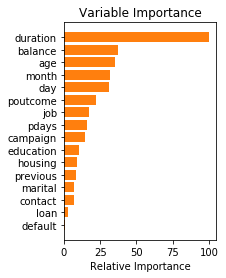

In [40]:
# #############################################################################
feature_names = np.asarray(bmarketing_df.columns.tolist())
# Plot feature importance
feature_importance = rfmodel.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [41]:
rfmodel.score(X_test, y_test)

0.9027572987319374

In [42]:
rfpred = rfmodel.predict(X_test)

In [45]:
print('Accuracy: \n', accuracy_score(y_test, rfpred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rfpred))
print('Classification Report: \n', classification_report(y_test, rfpred))

sns.heatmap(confusion_matrix(y_test, rfpred),annot=True,fmt="d")

Accuracy: 
 0.9027572987319374
Confusion Matrix: 
 [[11666   364]
 [  955   579]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.97      0.95     12030
          1       0.61      0.38      0.47      1534

avg / total       0.89      0.90      0.89     13564



##### The recall is intuitively the ability of the classifier to find all the positive samples.. The recall for y=0 is .38 -> indicating that possibility of identifying y=1 is less (tp/tp+fn )

The classification report shows high precision and high recall for prediction of y=0 (no) while it has low precision and low recall for prediction of y=1 (yes). As we know, this data is highly imbalanced with 88% of y=no and 11% of y=yes.


In [50]:
cohen_kappa_score(y_test, rfpred)

0.4173270823448919

In [74]:
# now let us check in the number of Percentage
cnt_term_deposit_y = len(bmarketing_df[bmarketing_df["y"]==1]) # Term deposit yes
cnt_term_deposit_n = len(bmarketing_df[bmarketing_df["y"]==0]) # Term deposit no

print("percentage of term deposit txns",cnt_term_deposit_y/(cnt_term_deposit_y + cnt_term_deposit_n)*100)
print("percentage of non-term deposit txns",cnt_term_deposit_n/(cnt_term_deposit_y + cnt_term_deposit_n)*100)


percentage of term deposit txns 11.698480458295547
percentage of non-term deposit txns 88.30151954170445


##### Hence in data there is only 0.11.7 % are the non-term deposit transcation while 88.3 are term-deposit transcations
So now we have to do resampling of this data


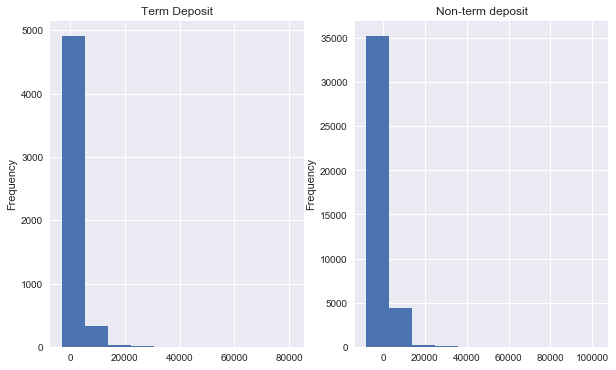

In [82]:
term_deposit_y = bmarketing_df[bmarketing_df["y"]==1]
term_deposit_n = bmarketing_df[bmarketing_df["y"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
term_deposit_y.balance.plot.hist(title="Term Deposit")
plt.subplot(122)
term_deposit_n.balance.plot.hist(title="Non-term deposit")

# Resampling- Undersampling

In [83]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
td_indices= np.array(bmarketing_df[bmarketing_df.y==1].index)
nontd_indices = np.array(bmarketing_df[bmarketing_df.y==0].index)
td_indices, nontd_indices

(array([   83,    86,    87, ..., 45206, 45207, 45208], dtype=int64),
 array([    0,     1,     2, ..., 45199, 45209, 45210], dtype=int64))

In [88]:
len(td_indices), len(nontd_indices)

(5289, 39922)

In [123]:
nontd_undersample = np.array(np.random.choice(nontd_indices,(3*cnt_term_deposit_y),replace=False))
undersample_data= np.concatenate([td_indices, nontd_undersample])
undersample_data = bmarketing_df.iloc[undersample_data,:]

In [124]:
undersample_data.y.value_counts()

0    15867
1     5289
Name: y, dtype: int64

In [125]:
print("TD transacations proportion is :",len(undersample_data[undersample_data.y==0])/len(undersample_data))
print("non TD transacations proportion is :",len(undersample_data[undersample_data.y==1])/len(undersample_data))
print("total number of records in resampled data is:",len(undersample_data))

TD transacations proportion is : 0.75
non TD transacations proportion is : 0.25
total number of records in resampled data is: 21156


In [ ]:
def undersample(nontd_indices, td_indices, times): #times denote the normal data = times*fraud data
    nontd_undersample = np.array(np.random.choice(nontd_indices,(times*cnt_term_deposit_y),replace=False))
    undersample_data= np.concatenate([td_indices, nontd_undersample])
    undersample_data = bmarketing_df.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [ ]:

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [51]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

#####  Using SMOTE to oversample our train data

In [126]:
X = bmarketing_df.drop(['y'], axis=1)
y = bmarketing_df.y

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [128]:
sm = SMOTE(random_state=0)

In [130]:
sm_Xtrain, sm_ytrain = sm.fit_sample(X_train, y_train)

In [138]:
sm_Xtrain = pd.DataFrame(data=sm_Xtrain, columns=X.columns)
sm_ytrain = pd.DataFrame(sm_ytrain, columns=['y'])
sm_Xtrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,39.0,4.0,2.0,2.0,0.0,4239.0,1.0,0.0,0.0,7.0,8.0,40.0,1.0,-1.0,0.0,3.0
1,44.0,4.0,1.0,2.0,0.0,647.0,0.0,0.0,2.0,16.0,6.0,226.0,2.0,-1.0,0.0,3.0
2,46.0,0.0,0.0,0.0,0.0,429.0,1.0,0.0,0.0,26.0,0.0,465.0,2.0,369.0,2.0,2.0
3,55.0,1.0,1.0,0.0,0.0,81.0,1.0,0.0,2.0,28.0,8.0,172.0,1.0,-1.0,0.0,3.0
4,28.0,0.0,1.0,1.0,0.0,172.0,1.0,0.0,0.0,19.0,10.0,123.0,2.0,-1.0,0.0,3.0


In [139]:
sm_ytrain.y.value_counts()

1    27892
0    27892
Name: y, dtype: int64

In [142]:
print("length of oversampled data is ",len(sm_Xtrain))
print("Number of term deposit=y transcations in oversampled data: ",len(sm_ytrain[sm_ytrain.y==1])/len(sm_Xtrain))
print("Number of term deposit=n transcations in oversampled data: ",len(sm_ytrain[sm_ytrain.y==0])/len(sm_Xtrain))

length of oversampled data is  55784
Number of term deposit=y transcations in oversampled data:  0.5
Number of term deposit=n transcations in oversampled data:  0.5


In [146]:
# Rescale data (between 0 and 1)
min_max=MinMaxScaler(feature_range=(0,1))

X_scaled = min_max.fit_transform(sm_Xtrain)
X_test_scaled = min_max.fit_transform(X_test)

In [163]:
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rfmodel = rf.fit(X_scaled, sm_ytrain.values)
# Find feature importance, print it
raw_feature_importance = rfmodel.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
print(feature_importance)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


[3.76, 4.67, 4.12, 7.19, 0.08, 4.07, 14.47, 3.35, 8.11, 3.84, 6.19, 26.34, 4.38, 2.61, 2.5, 4.33]


In [165]:
X_test_scaled

array([[0.23684211, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.19736842, 0.90909091, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.80263158, 0.45454545, 0.        , ..., 0.21504113, 0.07317073,
        0.        ],
       ...,
       [0.19736842, 0.        , 1.        , ..., 0.27967098, 0.04878049,
        0.        ],
       [0.28947368, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.22368421, 0.36363636, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [166]:
rfpred = rfmodel.predict(X_test_scaled)

In [167]:
print('Accuracy: \n', accuracy_score(y_test, rfpred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rfpred))
print('Classification Report: \n', classification_report(y_test, rfpred))

Accuracy: 
 0.9051164848127397
Confusion Matrix: 
 [[11672   358]
 [  929   605]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.63      0.39      0.48      1534

avg / total       0.89      0.91      0.90     13564



In [168]:
sm_ytrain.y.value_counts()

1    27892
0    27892
Name: y, dtype: int64

## 1) Simple Ensemble Techniques

In [169]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve
from sklearn.svm import SVC
from statistics import mode

### 1.1) Max Voting
The max voting method is used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

In [170]:
X = bmarketing_df.drop(['y'], axis=1)
y = bmarketing_df.y
# Rescale data (between 0 and 1)
min_max=MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [172]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegressionCV()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

In [173]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [174]:
pred1

array([0, 0, 1, ..., 1, 0, 0], dtype=int8)

In [175]:
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [176]:
pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [177]:
final_pred

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy: 
 0.8983338248304334
Confusion Matrix: 
 [[11801   229]
 [ 1150   384]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.91      0.98      0.94     12030
          1       0.63      0.25      0.36      1534

avg / total       0.88      0.90      0.88     13564



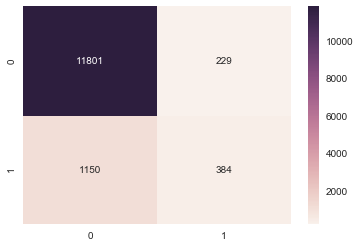

In [178]:
print('Accuracy: \n', accuracy_score(y_test,final_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,final_pred))
print('Classification Report: \n', classification_report(y_test,final_pred))

sns.heatmap(confusion_matrix(y_test,final_pred),annot=True,fmt="d")

### Voting Classifier

In [179]:
model1 = LogisticRegressionCV(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')

In [180]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8930256561486287

In [181]:
voting_pred = model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 
 0.8930256561486287
Confusion Matrix: 
 [[11917   113]
 [ 1338   196]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94     12030
          1       0.63      0.13      0.21      1534

avg / total       0.87      0.89      0.86     13564



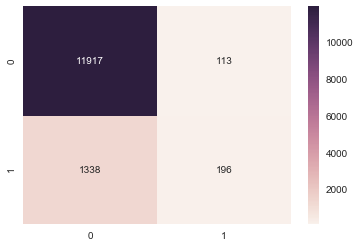

In [182]:
print('Accuracy: \n', accuracy_score(y_test,voting_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,voting_pred))
print('Classification Report: \n', classification_report(y_test,voting_pred))

sns.heatmap(confusion_matrix(y_test,voting_pred),annot=True,fmt="d")

### 1.2) Averaging

In [183]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegressionCV()

In [184]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [185]:
pred1 = model1.predict_proba(X_test)
pred2 = model1.predict_proba(X_test)
pred3 = model1.predict_proba(X_test)

In [186]:
final_pred_a = (pred1+pred2+pred3)/3
final_pred_a

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

### 1.3) Weighted Average 

In [188]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegressionCV()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

final_pred_w = (pred1*0.3+pred2*0.3+pred3*0.4)

In [189]:
final_pred_w

array([[0.96770699, 0.03229301],
       [0.98961358, 0.01038642],
       [0.58134771, 0.41865229],
       ...,
       [0.57095475, 0.42904525],
       [0.98295531, 0.01704469],
       [0.98333545, 0.01666455]])

## 2) Advanced Ensemble Technique 

### 2.1 Stacking
Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.  
    1) The train set is split into 10 parts.  
    2) A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.  
    3) The base model (in this case, decision tree) is then fitted on the whole train dataset.  
    4) Using this model, predictions are made on the test set.  
    5) Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.  
    6) The predictions from the train set are used as features to build a new model.  
    7) This model is used to make final predictions on the test prediction set.  
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

In [192]:
def Stacking(model,n_fold,train,test,y):
    folds = StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred = np.empty((test.shape[0],1),float)
    train_pred = np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        X_train,X_val = train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val = y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=X_train,y=y_train)
        train_pred = np.append(train_pred,model.predict(X_val))
        test_pred = np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [193]:
model1 = DecisionTreeClassifier(random_state=1)
test_pred1 ,train_pred1 = Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [85]:
train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [91]:
model2 = KNeighborsClassifier()
test_pred2 ,train_pred2 = Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

In [92]:
train_pred2 = pd.DataFrame(train_pred2)
test_pred2 = pd.DataFrame(test_pred2)

In [93]:
train_pred2.head()

,0
0,no
1,no
2,no
3,no
4,no


In [94]:
test_pred2.head()

,0
0,9.1991e-312
1,9.1996e-312
2,2.42122e-319
3,NaN
4,1.15998e-28


In [96]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegressionCV(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

ValueError: could not convert string to float: 'no'

### 2.2) Blending

### 2.3) Bagging

#### 2.3.1) Bagged Decision Trees

In [194]:
seed = 7
kfold = KFold(n_splits=10, random_state=1)
num_trees = 100
baggingmodel = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=num_trees, random_state=seed)

In [195]:
baggingmodel.fit(X_train, y_train)
baggingmodel.score(X_test, y_test)

0.90555883220289

Accuracy: 
 0.90555883220289
Confusion Matrix: 
 [[11573   457]
 [  824   710]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.96      0.95     12030
          1       0.61      0.46      0.53      1534

avg / total       0.90      0.91      0.90     13564



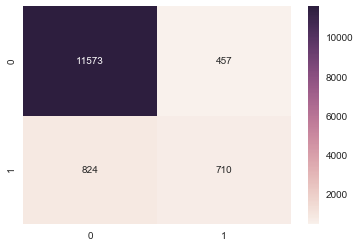

In [196]:
bagging_pred = baggingmodel.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test,bagging_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,bagging_pred))
print('Classification Report: \n', classification_report(y_test,bagging_pred))

sns.heatmap(confusion_matrix(y_test,bagging_pred),annot=True,fmt="d")

In [197]:
baggingresults = cross_val_score(baggingmodel, X, y, cv=kfold)
baggingresults

array([0.96638655, 0.95554081, 0.95244415, 0.91196638, 0.8562265 ,
       0.92125636, 0.81552754, 0.84251272, 0.85158151, 0.57597877])

In [198]:
print(baggingresults.mean())

0.8649421281452195


#### 2.3.2) Random Forest 

In [199]:
rfmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfmodel.fit(X_train, y_train)
rfpred = rfmodel.predict(X_test)

In [200]:
rfmodel.score(X_test, y_test)

0.9061486287230905

In [201]:
print('Accuracy: \n', accuracy_score(y_test,rfpred))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred))
print('Classification Report: \n', classification_report(y_test,rfpred))

Accuracy: 
 0.9061486287230905
Confusion Matrix: 
 [[11653   377]
 [  896   638]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.63      0.42      0.50      1534

avg / total       0.89      0.91      0.90     13564



In [202]:
rfmodel.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=2037072663, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=768005966, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [203]:
preds = np.stack([t.predict(X_test) for t in rfmodel.estimators_])

In [204]:
preds.shape

(100, 13564)

In [205]:
preds[:,0], np.mean(preds[:,0])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0.02)

In [206]:
roc_auc_score(y_test, rfpred)

0.6922839034530146

Variance Score


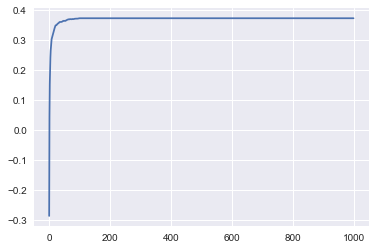

In [207]:
print('Variance Score')
plt.plot([r2_score(y_test, np.mean(preds[:i+1], axis=0))  for i in range(1000)])

#### The above plot indicates that there is not much difference with increasing the number of trees beyond 200. Ideal value seems to be 100. Lets verify this...

In [169]:
rfmodel = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rfmodel.fit(X_train, y_train)
rfmodel.score(X_test, y_test)

0.9096136832792686

In [208]:
seed = 7
num_trees = 100
max_features = 3
rfkfold = model_selection.KFold(n_splits=10, random_state=1)
rfmodel = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
rfresults = model_selection.cross_val_score(rfmodel, X, y, cv=rfkfold)
print(rfresults.mean())

0.8837653679849338


In [210]:
rfmodel1 = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9037157180772634
Confusion Matrix: 
 [[11684   346]
 [  960   574]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.97      0.95     12030
          1       0.62      0.37      0.47      1534

avg / total       0.89      0.90      0.89     13564



In [211]:
rfmodel1 = RandomForestClassifier(n_estimators=20, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9031259215570628
Confusion Matrix: 
 [[11680   350]
 [  964   570]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.97      0.95     12030
          1       0.62      0.37      0.46      1534

avg / total       0.89      0.90      0.89     13564



In [212]:
rfmodel1 = RandomForestClassifier(n_estimators=40, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.903420819817163
Confusion Matrix: 
 [[11639   391]
 [  919   615]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.61      0.40      0.48      1534

avg / total       0.89      0.90      0.89     13564



In [213]:
rfmodel1 = RandomForestClassifier(n_estimators=60, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9064435269831908
Confusion Matrix: 
 [[11657   373]
 [  896   638]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.63      0.42      0.50      1534

avg / total       0.89      0.91      0.90     13564



In [214]:
rfmodel1 = RandomForestClassifier(n_estimators=80, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9080654674137423
Confusion Matrix: 
 [[11681   349]
 [  898   636]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.65      0.41      0.50      1534

avg / total       0.90      0.91      0.90     13564



In [215]:
rfmodel1 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9057800058979653
Confusion Matrix: 
 [[11650   380]
 [  898   636]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.63      0.41      0.50      1534

avg / total       0.89      0.91      0.90     13564



In [216]:
rfmodel1 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9081391919787674
Confusion Matrix: 
 [[11665   365]
 [  881   653]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.64      0.43      0.51      1534

avg / total       0.90      0.91      0.90     13564



In [217]:
rfmodel1 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9087289884989679
Confusion Matrix: 
 [[11666   364]
 [  874   660]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.64      0.43      0.52      1534

avg / total       0.90      0.91      0.90     13564



In [218]:
rfmodel1 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,rfpred1))
print('Classification Report: \n', classification_report(y_test,rfpred1))

Accuracy: 
 0.9082866411088174
Confusion Matrix: 
 [[11666   364]
 [  880   654]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.64      0.43      0.51      1534

avg / total       0.90      0.91      0.90     13564



In [223]:
rfmodel = RandomForestClassifier(n_estimators=150, n_jobs=-1)
rfmodel.fit(X_train, y_train)
rfmodel.score(X_test, y_test)
rfpred = rfmodel.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, rfpred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rfpred))
print('Classification Report: \n', classification_report(y_test, rfpred))

Accuracy: 
 0.9074756708935418
Confusion Matrix: 
 [[11661   369]
 [  886   648]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.64      0.42      0.51      1534

avg / total       0.90      0.91      0.90     13564



In [224]:
fpr, tpr, threshold = roc_curve(y_test, rfpred)

In [225]:
fpr, tpr

(array([0.        , 0.03067332, 1.        ]),
 array([0.        , 0.42242503, 1.        ]))

In [226]:
roc_auc = auc(fpr, tpr)

fpr:  
Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].    
tpr : array, shape = [>2]  
    Increasing true positive rates such that element i is the true  
    positive rate of predictions with score >= thresholds[i].  
  
thresholds : array, shape = [n_thresholds]  
    Decreasing thresholds on the decision function used to compute  fpr and tpr.   
    `thresholds[0]` represents no instances being predicted  and is arbitrarily set to `max(y_score) + 1`.  


#### Receiver Operating Characteristic
In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test (Zweig & Campbell, 1993).

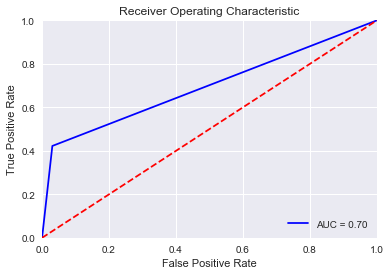

In [227]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [228]:
accuracy_score(y_test, rfpred)

0.9074756708935418

In [229]:
print(classification_report(y_test, rfpred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.64      0.42      0.51      1534

avg / total       0.90      0.91      0.90     13564



### The classification report shows high precision and high recall for prediction of y=no while it has low precision and low recall for prediction of y=yes. As we know, this data is highly imbalanced with 88% of y=no and 11% of y=yes.

### Precision-Recall curve

Precision-Recall metric evaluates the classifier output quality.
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In [230]:
precision, recall, threshold = precision_recall_curve(y_test, rfpred)
average_precision = average_precision_score(y_test, rfpred)

In [231]:
precision, recall

(array([0.11309348, 0.63716814, 1.        ]),
 array([1.        , 0.42242503, 0.        ]))

Text(0.5,1,'2-class Precision-Recall curve: AP=0.33')

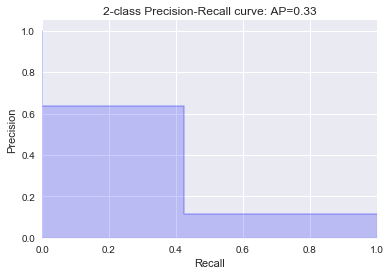

In [232]:
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [233]:
average_precision_score(y_test, rfpred)

0.33447573759279053

In [234]:
print(confusion_matrix(y_test, rfpred))

[[11661   369]
 [  886   648]]


In [235]:
print(classification_report(y_test, rfpred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.64      0.42      0.51      1534

avg / total       0.90      0.91      0.90     13564



### OOB Score

In [237]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(model):
    result = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_test), y_test),
                model.score(X_train, y_train), model.score(X_test, y_test)]
    if hasattr(model, 'oob_score_'): result.append(model.oob_score_)
    print("rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):")
    print(result)

In [238]:
rfmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[0.00562126068996601, 0.3045414631893882, 0.9999684014282555, 0.9072544971984665, 0.9035611590356116]


In [239]:
rfmodel.oob_score_, rfmodel.score(X_train, y_train), rfmodel.score(X_test, y_test)

(0.9035611590356116, 0.9999684014282555, 0.9072544971984665)

### Reducing Overfitting

    1) grow trees less deeply - with min_samples_leaf. This will result in  less decision rules for each leaf node; simpler models should generalize better. The predictions are made by averaging more rows in the leaf node, resulting in less volatility
    2) increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. This can be done by specifying max_features, which is the proportion of features to randomly select from at each split.

In [240]:
rfmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[0.2210235098741429, 0.3042992830610735, 0.9511486080829147, 0.9074019463285167, 0.9034979618921225]


In [241]:
rfmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[0.2039208680244305, 0.30369298781229376, 0.9584162795841628, 0.907770569153642, 0.9050462919076058]


In [242]:
rfmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=seed)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[0.20337780216539195, 0.3015002299765405, 0.9586374695863747, 0.9090976113240932, 0.9053938761967959]


### 2.4) Boosting Algorithms

#### 2.4.1) AdaBoost
Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

In [243]:
rfcmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=seed)
adamodel = AdaBoostClassifier(base_estimator=rfcmodel, random_state=10, n_estimators=100)
adamodel.fit(X_train, y_train)
adamodel.score(X_test,y_test)

0.9062223532881156

In [244]:
adapred = adamodel.predict(X_test)

Accuracy: 
 0.9062223532881156
Confusion Matrix: 
 [[11690   340]
 [  932   602]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.64      0.39      0.49      1534

avg / total       0.89      0.91      0.90     13564



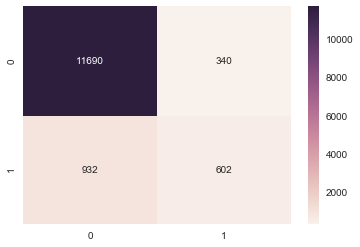

In [245]:
print('Accuracy: \n', accuracy_score(y_test, adapred))
print('Confusion Matrix: \n', confusion_matrix(y_test, adapred))
print('Classification Report: \n', classification_report(y_test, adapred))

sns.heatmap(confusion_matrix(y_test, adapred),annot=True,fmt="d")

#### 2.4.2) Gradient Boosting
Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

In [247]:
gbmodel = GradientBoostingClassifier(learning_rate=0.01, random_state=1, n_estimators=100)
gbmodel.fit(X_train, y_train)
gbmodel.score(X_test, y_test)

0.8884547331170746

In [248]:
gbpred = gbmodel.predict(X_test)

Accuracy: 
 0.8884547331170746
Confusion Matrix: 
 [[12023     7]
 [ 1506    28]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     12030
          1       0.80      0.02      0.04      1534

avg / total       0.88      0.89      0.84     13564



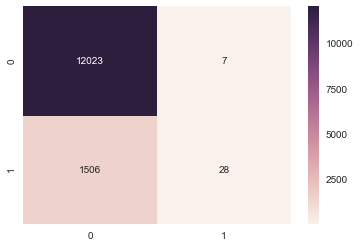

In [249]:
print('Accuracy: \n', accuracy_score(y_test, gbpred))
print('Confusion Matrix: \n', confusion_matrix(y_test, gbpred))
print('Classification Report: \n', classification_report(y_test, gbpred))

sns.heatmap(confusion_matrix(y_test, gbpred),annot=True,fmt="d")

#### Optimizing the parameters

In [250]:
from sklearn.grid_search import GridSearchCV
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5]
              }
gb_clf_cv = GridSearchCV(GradientBoostingClassifier(n_estimators=100),
                   param_grid, n_jobs=4, refit=True)

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [251]:
gb_clf_model_cv = gb_clf_cv.fit(X_train, y_train)

In [252]:
gb_clf_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 3}

In [253]:
gb_clf_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [254]:
gb_clf_cv.best_score_

0.9071949947862357

In [255]:
%%time
params_best = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3,
          'learning_rate': 0.1, 'loss': 'deviance'}
gb_clf_best = GradientBoostingClassifier(**params_best)
gb_model_best = gb_clf_best.fit(X_train, y_train)
gb_model_pred_best = gb_clf_best.predict(X_test)

Wall time: 5.43 s


In [256]:
mse_best = mean_squared_error(y_test, gb_model_pred_best)
print("MSE: %.4f" % mse_best)
print("Accuracy Score/ R squared for Train: %.2f" %gb_model_best.score(X_train, y_train))
print("Accuracy Score/ R squared for Test: %.2f" %gb_model_best.score(X_test, y_test))

MSE: 0.0908
Accuracy Score/ R squared for Train: 0.92
Accuracy Score/ R squared for Test: 0.91


Accuracy: 
 0.9091713358891182
Confusion Matrix: 
 [[11667   363]
 [  869   665]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.65      0.43      0.52      1534

avg / total       0.90      0.91      0.90     13564



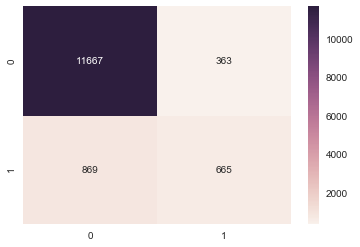

In [257]:
print('Accuracy: \n', accuracy_score(y_test, gb_model_pred_best))
print('Confusion Matrix: \n', confusion_matrix(y_test, gb_model_pred_best))
print('Classification Report: \n', classification_report(y_test, gb_model_pred_best))

sns.heatmap(confusion_matrix(y_test, gb_model_pred_best),annot=True,fmt="d")

#### 2.4.3) XGBoost
XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. 

In [258]:
import xgboost as xgb

In [259]:
xgb_model = xgb.XGBClassifier()

In [260]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9073282217634916

In [261]:
xgb_model_pred = xgb_model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 
 0.9073282217634916
Confusion Matrix: 
 [[11742   288]
 [  969   565]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.98      0.95     12030
          1       0.66      0.37      0.47      1534

avg / total       0.89      0.91      0.90     13564



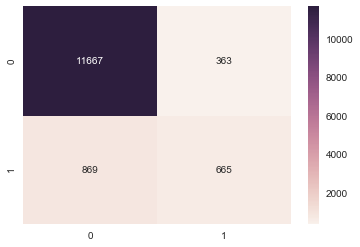

In [262]:
print('Accuracy: \n', accuracy_score(y_test, xgb_model_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, xgb_model_pred))
print('Classification Report: \n', classification_report(y_test, xgb_model_pred))

sns.heatmap(confusion_matrix(y_test, gb_model_pred_best),annot=True,fmt="d")

In [264]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [3, 4, 6],
              'n_estimators': [50, 100, 200, 500, 1000]
              }
xgb_clf_cv = GridSearchCV(xgb.XGBClassifier(),param_grid, n_jobs=4, refit=True)

In [265]:
xgb_clf_model_cv = xgb_clf_cv.fit(X_train, y_train)

In [266]:
xgb_clf_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

In [267]:
xgb_clf_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [268]:
%%time
params_best = {'n_estimators': 100, 'max_depth': 6, 'n_jobs': 1}
xgb_clf_best = xgb.XGBClassifier(**params_best)
xgb_model_best = xgb_clf_best.fit(X_train, y_train)
xgb_model_pred_best = xgb_clf_best.predict(X_test)

Wall time: 5.29 s


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [269]:
mse_best = mean_squared_error(y_test, xgb_model_pred_best)
print("MSE: %.4f" % mse_best)
print("Accuracy Score/ R squared for Train: %.2f" %xgb_model_best.score(X_train, y_train))
print("Accuracy Score/ R squared for Test: %.2f" %xgb_model_best.score(X_test, y_test))

MSE: 0.0913
Accuracy Score/ R squared for Train: 0.93
Accuracy Score/ R squared for Test: 0.91


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 
 0.9087289884989679
Confusion Matrix: 
 [[11622   408]
 [  830   704]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     12030
          1       0.63      0.46      0.53      1534

avg / total       0.90      0.91      0.90     13564



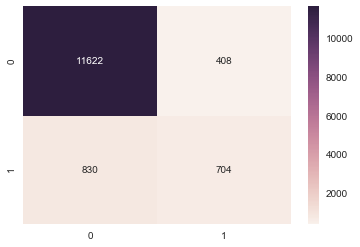

In [270]:
print('Accuracy: \n', accuracy_score(y_test, xgb_model_pred_best))
print('Confusion Matrix: \n', confusion_matrix(y_test, xgb_model_pred_best))
print('Classification Report: \n', classification_report(y_test, xgb_model_pred_best))

sns.heatmap(confusion_matrix(y_test, xgb_model_pred_best),annot=True,fmt="d")

#### 2.4.4) Light GBM
Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern.

In [271]:
import lightgbm as lgb

#define parameters
params = {'learning_rate':0.01}
train_data = lgb.Dataset(X_train, label=y_train)

In [272]:
lgb_model= lgb.train(params, train_data, 100) 

In [273]:
lgb_pred = lgb_model.predict(X_test)

In [274]:
for i in range(len(lgb_pred)):
    if lgb_pred[i]>=0.5: 
        lgb_pred[i]=1
    else: 
        lgb_pred[i]=0

Accuracy: 
 0.8924358596284282
Confusion Matrix: 
 [[11991    39]
 [ 1420   114]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     12030
          1       0.75      0.07      0.14      1534

avg / total       0.88      0.89      0.85     13564



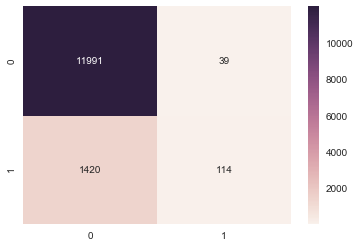

In [275]:
print('Accuracy: \n', accuracy_score(y_test, lgb_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, lgb_pred))
print('Classification Report: \n', classification_report(y_test, lgb_pred))

sns.heatmap(confusion_matrix(y_test, lgb_pred),annot=True,fmt="d")

# SVM

In [ ]:
from sklearn import svm
### Support Vector Classifier ###
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC

In [ ]:
svc_model = SVC(kernel='linear', C=1E10)
svc_model.fit(X_train, y_train)

In [ ]:
svc_model.coef_

In [280]:
svc_model.support_

array([    6,    13,    21, ..., 31630, 31639, 31643])

In [281]:
svc_model.support_vectors_

array([[0.45454545, 0.45454545, 0.5       , ..., 0.38302752, 0.00363636,
        0.33333333],
       [0.50649351, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.16883117, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.23376623, 0.36363636, 0.5       , ..., 0.21100917, 0.01818182,
        0.66666667],
       [0.15584416, 0.72727273, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37662338, 0.63636364, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [283]:
svc_pred = svc_model.predict(X_test)

Accuracy: 
 0.8869065172515482
Confusion Matrix: 
 [[12030     0]
 [ 1534     0]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     12030
          1       0.00      0.00      0.00      1534

avg / total       0.79      0.89      0.83     13564



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


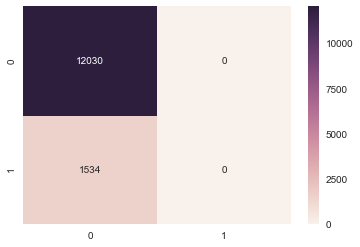

In [284]:
print('Accuracy: \n', accuracy_score(y_test, svc_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, svc_pred))
print('Classification Report: \n', classification_report(y_test, svc_pred))

sns.heatmap(confusion_matrix(y_test, svc_pred),annot=True,fmt="d")